<br/>
<br/>
<center>
    <h2>Chances of a heart attack<h2/>
    <h4>(Classification)<h4/>
<center/>
<br/>

<h4>import packges<h4/>

In [33]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

<br/>
<h4>read data<h4/>

In [34]:
data : pd.DataFrame  = pd.read_csv('heart.csv')
data.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<br/>
<h4>Removing some features that are not very important and create a new df<h4/>

In [35]:
df = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall', 'output']]


# convert df to normal matrix
x = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall']].values
y = df[['output']].values

df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

<br/>
<h4>normalizing data<h4/>

In [36]:
scaler = StandardScaler().fit(x)
nx = scaler.transform(x.astype(float))

<br/>
<h4>split test and tran data 20 80<h4/>

In [37]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(nx, y, test_size=0.25, random_state=5) 

<br/>
<h3>1-LogisticRegression<h3/>
<h4>train model<h4/>

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_tr, y_tr.ravel())
yhl = LR.predict(x_te)
print(yhl[0:7], y_te[0:7].ravel())

[1 0 0 0 1 0 1] [0 0 0 0 1 0 1]


<br/>
<h4>test model logistic regression<h4/>

In [39]:
from sklearn.metrics import classification_report as report
print(report(y_te, yhl))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.90      0.95      0.92        38

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



<br/>
<h2>plotting data<h2/>

Confusion matrix, without normalization
[[36  2]
 [ 4 34]]


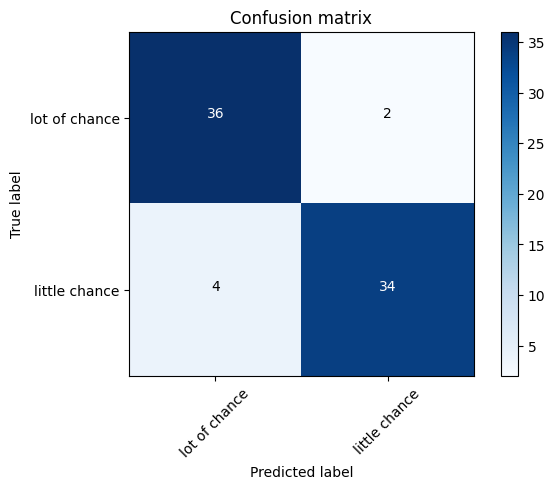

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix_l = confusion_matrix(y_te, yhl, labels=[1,0])


plt.figure()
plot_confusion_matrix(cnf_matrix_l, classes=['lot of chance','little chance'])

<br/>
<center>---------------------------------------------------------------------------------------------------------------<center/>
<br/>

<br/>
<h3>2-Knn<h3/>
<h4>train model<h4/>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_tr,y_tr.ravel())
yhk = neigh.predict(x_te)
print(yhk[0:7], y_te[0:7].ravel())

[1 0 0 0 1 0 0] [0 0 0 0 1 0 1]


<br/>
<h4>test model knn<h4/>

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.86      0.84      0.85        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76

Confusion matrix, without normalization
[[32  6]
 [ 5 33]]


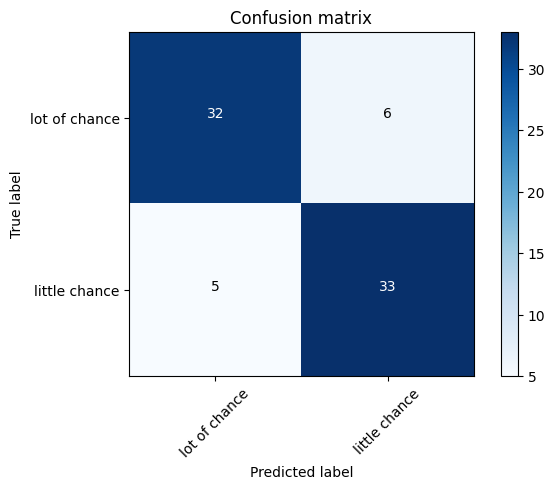

In [42]:
from sklearn.metrics import classification_report as report
print(report(y_te, yhk))

cnf_matrix_k = confusion_matrix(y_te, yhk, labels=[1,0])


plt.figure()
plot_confusion_matrix(cnf_matrix_k, classes=['lot of chance','little chance'])

<br/>
<center>---------------------------------------------------------------------------------------------------------------<center/>
<br/>

<br/>
<h3>3-SVM<h3/>
<h4>train model<h4/>

In [43]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_tr, y_tr.ravel()) 
yhs = clf.predict(x_te)
print(yhs[0:7], y_te[0:7].ravel())

[1 0 0 0 1 0 1] [0 0 0 0 1 0 1]


<br/>
<h4>test model svm<h4/>

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        38
           1       0.88      0.95      0.91        38

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76

Confusion matrix, without normalization
[[32  6]
 [ 5 33]]


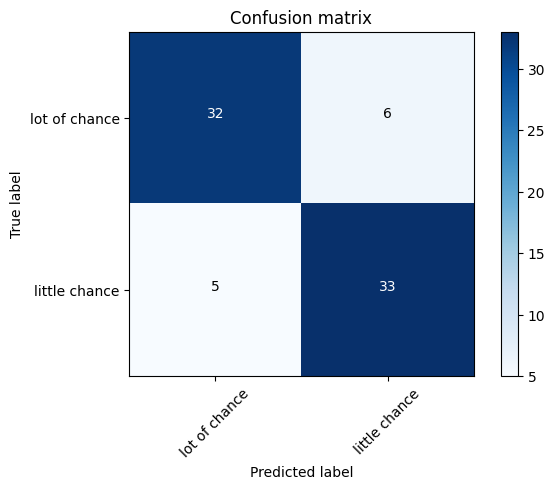

In [44]:
from sklearn.metrics import classification_report as report
print(report(y_te, yhs))

cnf_matrix_s = confusion_matrix(y_te, yhk, labels=[1,0])

plt.figure()
plot_confusion_matrix(cnf_matrix_s, classes=['lot of chance','little chance'])

<br/>
<center>---------------------------------------------------------------------------------------------------------------<center/>
<br/>

<br/>
<h3>4-Decision Trees<h3/>
<h4>train model<h4/>


In [45]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(x_tr, y_tr.ravel())
yhd = drugTree.predict(x_te)
print(yhd[0:7], y_te[0:7].ravel())


[1 0 0 1 0 0 1] [0 0 0 0 1 0 1]


<br/>
<h4>test model Decision Trees<h4/>

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.81      0.92      0.86        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.85        76
weighted avg       0.86      0.86      0.85        76

Confusion matrix, without normalization
[[35  3]
 [ 8 30]]


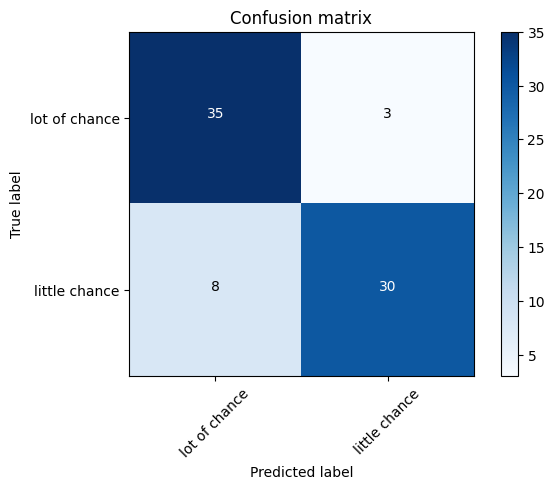

In [46]:
from sklearn.metrics import classification_report as report
print(report(y_te, yhd))

cnf_matrix_d = confusion_matrix(y_te, yhd, labels=[1,0])

plt.figure()
plot_confusion_matrix(cnf_matrix_d, classes=['lot of chance','little chance'])